# Assignment Day 20 | 26th September 2020

## Question 1:
### Anova
### Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10 assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the following points:
### Pat – 5, 4, 4, 3, 9, 4 ; Jack – 4, 8, 7, 5, 1, 5 ; Alex – 9, 9, 8, 10, 4, 10
### Based on the above results we would like to know who the best archer is. In other words our null hypothesis is that the means of all populations are equal.

In [1]:
import pandas as pd

In [2]:
pat = [5, 4, 4, 3, 9, 4]
jack = [4, 8, 7, 5, 1, 5]
alex = [9, 9, 8, 10, 4, 10]

In [3]:
all_scores = pat + jack + alex
participant_names = (['pat'] * len(pat)) +  (['jack'] * len(jack)) +  (['alex'] * len(alex))

In [4]:
data = pd.DataFrame({'participants': participant_names, 'score': all_scores})
data

,participants,score
0,pat,5
1,pat,4
2,pat,4
3,pat,3
4,pat,9
5,pat,4
6,jack,4
7,jack,8
8,jack,7
9,jack,5


In [14]:
data.groupby('participants').mean()


,score
participants,
alex,8.333333
jack,5.000000
pat,4.833333


In [27]:
pat = pd.Series(pat)
pat_mean = pat.mean()

jack = pd.Series(jack)
jack_mean = jack.mean()

alex = pd.Series(alex)
alex_mean = alex.mean()

print("Mean of pat is:",pat_mean, "\nMean of jack is:", jack_mean,"\nMean of alex is:" ,alex_mean)

Mean of pat is: 4.833333333333333 
Mean of jack is: 5.0 
Mean of alex is: 8.333333333333334


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
lm = ols('score ~ participants',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

                df     sum_sq    mean_sq         F    PR(>F)
participants   2.0  46.777778  23.388889  4.488273  0.029668
Residual      15.0  78.166667   5.211111       NaN       NaN


#### The p-value is less than 0.05 i.e. we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist.

In [11]:
import scipy.stats 
critical_value = scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=15)
critical_value

3.6823203436732412

#### Our critical value is less than the f-value. So, So we can reject the null hypotheses which was that means of all population are equal.

<AxesSubplot:>

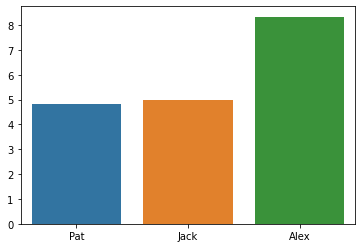

In [28]:
import seaborn as sns

sns.barplot(data = d, x = ["Pat", "Jack", "Alex"], y=[pat_mean, jack_mean, alex_mean])

### According to the above graph, we can clearly see that Alex was the best archer amongst other players because of his average score which is more than both.